In [1]:
import strongholds
import strongholds.graphing as mplt

import numpy as np

from matplotlib import pyplot as plt, patches

fixed_rng = np.random.default_rng(0)

## Generation
The [Ninjabrain Bot documentation](https://github.com/Ninjabrain1/Ninjabrain-Bot/blob/main/triangulation.pdf) explains the steps of stronghold generation for a given ring:
1. The stronghold is given a random radius between the inner and outer radii of the ring.
2. The stronghold is given a random angle between $0$ and $2 \pi$ radians. The other strongholds are then placed in even angle segments around the rest of the ring, like the spokes of a wheel.
3. The stronghold is "snapped" to the nearest chunk origin ((0, 0) in the chunk), and then snapped again to the center (8, 8) of a chunk up to 7 chunks away in both the $x$ and $z$ dimensions.

The random generation in the first two steps is uniform, and that of the third step can be approximated as uniform as well.

Digression: It is the third step that gives the stronghold distribution in a world its random shape; without biome snapping, it would look a lot neater, as shown below.

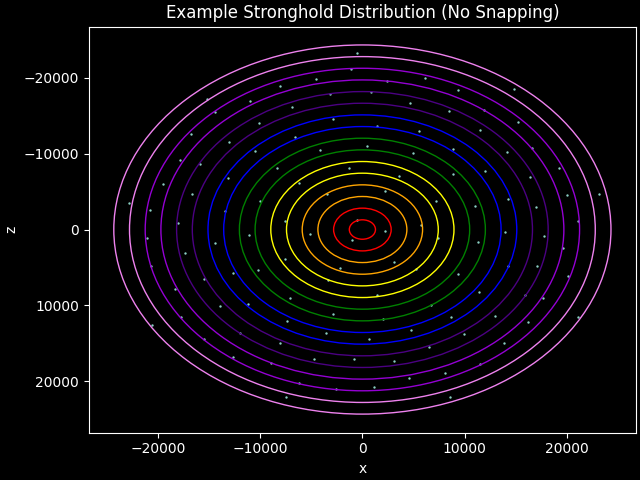

In [2]:
%matplotlib widget
import strongholds.chunk_math


no_snap = strongholds.generate_all(snap=False, rng=fixed_rng)

fig, ax = mplt.xz_subplots()
ax.set_title("Example Stronghold Distribution (No Snapping)")

ax.scatter(no_snap.real, no_snap.imag, s=0.5)

colors = ["red", "orange", "yellow", "green", "blue", "indigo", "darkviolet", "violet"]

circles = []
for a, b, color in zip(strongholds.chunk_math.inner_radii,
                       strongholds.chunk_math.outer_radii,
                       colors):
    circles.append(patches.Circle((0., 0.), radius=a, color=color, fill=False))
    ax.add_patch(circles[-1])

    circles.append(patches.Circle((0., 0.), radius=b, color=color, fill=False))
    ax.add_patch(circles[-1])

mplt.flip_zaxis(ax)

So, where are strongholds most likely to generate? While we could use statistics to find out, we can also just generate a bunch of strongholds and make a heat map of them. We do exactly that below for the first four rings:

In [3]:
ring_map = strongholds.generation_heatmap(1*10**5, range(4), fixed_rng)

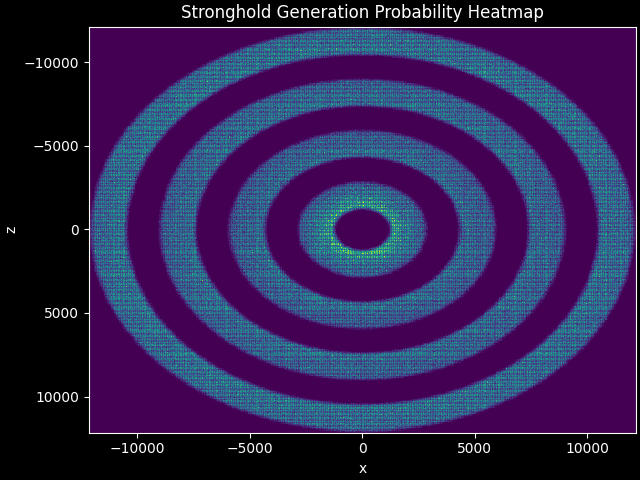

In [4]:
fig2, ax2 = mplt.xz_subplots()
ax2.set_title("Stronghold Generation Probability Heatmap")

ring_hist2d = ax2.hist2d(ring_map.real, ring_map.imag, bins=600)

mplt.flip_zaxis(ax2)

We can split this 2D histogram into two 1D histograms: one for the radius, and another for the angle.

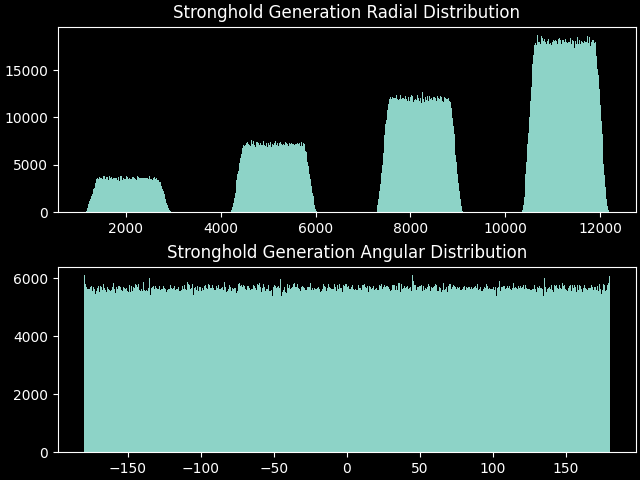

In [5]:
fig4, ax4 = plt.subplots(2, 1, constrained_layout=True)
ax4[0].set_title("Stronghold Generation Radial Distribution")
ax4[1].set_title("Stronghold Generation Angular Distribution")

ring_r, ring_phi = strongholds.radius(ring_map), strongholds.angle(ring_map, deg=True)

ring_r_hist = ax4[0].hist(ring_r, bins=600)
ring_phi_hist = ax4[1].hist(ring_phi, bins=600)

Predictably, the angular distribution is mostly uniform - that is, the likelihood that a stronghold will generate at a given angle from the $x$ axis is equal for all angles.

Meanwhile, the radial distribution for each ring seems to be shaped like a trapezoid, rather than the rectangle that uniformity would give. This makes sense - since biome snapping can send a radius that's close to an edge of a ring back towards the middle of it, radii closer to the edge of the ring are more likely. This is equivalent to, for instance, comparing the distribution of a 12-sided dice roll vs that of two 6-sided dice.